## ひらがな手書きの文字認識

### データのダウンロード（NDL LABからひらがなのデータ）

In [1]:
!wget http://lab.ndl.go.jp/dataset/hiragana73.zip

--2019-04-03 03:40:34--  http://lab.ndl.go.jp/dataset/hiragana73.zip
Resolving lab.ndl.go.jp (lab.ndl.go.jp)... 202.32.173.150
Connecting to lab.ndl.go.jp (lab.ndl.go.jp)|202.32.173.150|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://lab.ndl.go.jp/dataset/hiragana73.zip [following]
--2019-04-03 03:40:34--  https://lab.ndl.go.jp/dataset/hiragana73.zip
Connecting to lab.ndl.go.jp (lab.ndl.go.jp)|202.32.173.150|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 233312433 (223M) [application/zip]
Saving to: ‘hiragana73.zip’

hiragana73.zip      100%[===================>] 222.50M  13.2MB/s    in 19s     

2019-04-03 03:40:56 (11.6 MB/s) - ‘hiragana73.zip’ saved [233312433/233312433]



In [6]:
!mv ./hiragana73.zip /home

total 186656
drwxr-sr-x  5 root 2004      6144 Apr  2 08:59 ./
drwxr-sr-x 63 root 2004      6144 Apr  2 08:50 ../
drwxr-sr-x  2 root 2004      6144 Apr  2 08:53 .ipynb_checkpoints/
drwxr-sr-x  4 root 2004      6144 Apr  2 08:50 .jupyter/
-rw-r--r--  1 root 2004    194624 Apr  2 08:57 hiragana.ipynb
-rw-r--r--  1 root 2004 190912466 Nov  9  2016 hiragana73.7z
-rw-r--r--  1 root 2004      2472 Apr  2 08:53 rename.sh
drwxr-sr-x  3 root 2004      6144 Apr  2 08:50 samples/


In [9]:
!cd /home
!unzip hiragana73.zip > /dev/null

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (9.20.1~dfsg.1-4.2ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 55 not upgraded.


In [8]:
# フォルダのリネーム（命名がユニコードになっているので、自分のnotebookIDを入れる）
!sh /mnt/notebooks/XXXX/rename.sh

In [18]:
cd hiragana73

/home/hiragana73


In [19]:
ls -al

total 4676
drwxr-xr-x 75 root root  4096 Apr  3 03:50 ./
drwxr-xr-x  1 root root    46 Apr  3 03:45 ../
drwxr-xr-x  2 root root 45056 Sep  8  2016 0/
drwxr-xr-x  2 root root 45056 Sep  8  2016 1/
drwxr-xr-x  2 root root 40960 Sep  8  2016 10/
drwxr-xr-x  2 root root 45056 Sep  8  2016 11/
drwxr-xr-x  2 root root 40960 Sep  8  2016 12/
drwxr-xr-x  2 root root 45056 Sep  8  2016 13/
drwxr-xr-x  2 root root 40960 Sep  8  2016 14/
drwxr-xr-x  2 root root 49152 Sep  8  2016 15/
drwxr-xr-x  2 root root 40960 Sep  8  2016 16/
drwxr-xr-x  2 root root 49152 Sep  8  2016 17/
drwxr-xr-x  2 root root 40960 Sep  8  2016 18/
drwxr-xr-x  2 root root 49152 Sep  8  2016 19/
drwxr-xr-x  2 root root 45056 Sep  8  2016 2/
drwxr-xr-x  2 root root 40960 Sep  8  2016 20/
drwxr-xr-x  2 root root 45056 Sep  8  2016 21/
drwxr-xr-x  2 root root 45056 Sep  8  2016 22/
drwxr-xr-x  2 root root 49152 Sep  8  2016 23/
drwxr-xr-x  2 root root 40960 Sep  8  2016 24/
drwxr-xr-x  2 root root 49152 Sep  8  2016 25/
drwxr-

In [20]:
# フォルダの一覧を取得する(hiragana73配下)
import os
path = "./"
folder = os.listdir(path)

### 前処理

In [22]:
import glob
from PIL import Image
import numpy as np
import random
image_size = 48
 
X_train = []
Y_train = []
X_test = []
Y_test = []
for index, name in enumerate(folder):
  
    #フォルダの一覧をリストとして取得する
    dir = "./" + name
    files = glob.glob(dir + "/*.png")
    random.shuffle(files)
    
    # 学習とテストで9:1のデータ割合に分ける
    split_num = len(files)*0.8
    num = 0
    for i, file in enumerate(files):
      image = Image.open(file)
      image = image.convert("RGB")
      #image = image.convert('L')
      image = image.resize((image_size, image_size))
      data = np.asarray(image)
      if split_num > num:
        X_train.append(data)
        Y_train.append(name)
      else:
        X_test.append(data)
        Y_test.append(name)
      num += 1
 
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [27]:
# ラベルと対象データを確認
Y_test[1]

'41'

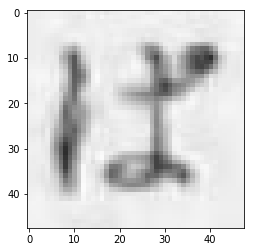

In [28]:
import matplotlib.pyplot as plt
im_list = np.asarray(X_train[1])
plt.imshow(im_list)
plt.show()

In [25]:
# trainとtestがデータが分割されていることを確認する
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

64027
64027
15973
15973


In [29]:
# 0-255の整数値を0〜1の小数に変換する(正規化)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [30]:
# one-hot vector形式に変換する
from keras.utils import np_utils
Y_train = np_utils.to_categorical(Y_train, 73)
Y_test = np_utils.to_categorical(Y_test, 73)

Using TensorFlow backend.


In [152]:
# モデルの定義（別資料にて説明）
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(48, 48, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(73, activation='softmax'))

from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [153]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [154]:
history = model.fit(X_train, Y_train,
                    batch_size=128,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_test, Y_test))

Train on 64027 samples, validate on 15973 samples
Epoch 1/20
64027/64027 [==============================] - 15s 241us/step - loss: 2.8192 - acc: 0.3901 - val_loss: 0.8293 - val_acc: 0.7909
Epoch 2/20
64027/64027 [==============================] - 14s 221us/step - loss: 0.4529 - acc: 0.8896 - val_loss: 0.3223 - val_acc: 0.9164
Epoch 3/20
64027/64027 [==============================] - 14s 218us/step - loss: 0.2353 - acc: 0.9413 - val_loss: 0.1948 - val_acc: 0.9472
Epoch 4/20
64027/64027 [==============================] - 14s 217us/step - loss: 0.1605 - acc: 0.9590 - val_loss: 0.1496 - val_acc: 0.9582
Epoch 5/20
64027/64027 [==============================] - 14s 221us/step - loss: 0.1218 - acc: 0.9680 - val_loss: 0.1214 - val_acc: 0.9691
Epoch 6/20
64027/64027 [==============================] - 14s 223us/step - loss: 0.0980 - acc: 0.9735 - val_loss: 0.1317 - val_acc: 0.9622
Epoch 7/20
64027/64027 [==============================] - 14s 218us/step - loss: 0.0820 - acc: 0.9771 - val_loss: 0.

In [155]:
predict = model.predict(X_test)

In [156]:
len(predict)

15973

In [157]:
hiragana_list = ["あ","い","う","え","お","か","が","き","ぎ","く","ぐ","け","げ","こ","ご","さ","ざ","し","じ","す","ず","せ","ぜ","そ","ぞ","た","だ","ち","ぢ","つ","づ","て","で","と","ど","な","に","ぬ","ね","の","は","ば","ぱ","ひ","び","ぴ","ふ","ぶ","ぷ","へ","べ","ぺ","ほ","ぼ","ぽ","ま","み","む","め","も","や","ゆ","よ","ら","り","る","れ","ろ","わ","ゐ","ゑ","を","ん"]

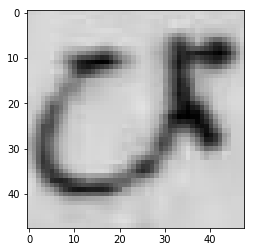

In [165]:
import matplotlib.pyplot as plt
ind = 500
im_list = np.asarray(X_test[ind])
plt.imshow(im_list)
plt.show()

In [166]:
hiragana_list[predict[ind].tolist().index(max(predict[ind]))]

'び'

In [167]:
#モデルの保存
model.save('hiragana_model.h5', include_optimizer=False)

In [168]:
from keras.models import load_model
import numpy as np
from keras.preprocessing.image import img_to_array, load_img

jpg_name = ''

model=load_model('./hiragana_model.h5')

img_path = ('/mnt/notebooks/1726693628713/test2.png')
img = img_to_array(load_img(img_path, target_size=(48,48)))
img_nad = img_to_array(img)/255
img_nad = img_nad[None, ...]

label=["あ","い","う","え","お","か","が","き","ぎ","く","ぐ","け","げ","こ","ご","さ","ざ","し","じ","す","ず","せ","ぜ","そ","ぞ","た","だ","ち","ぢ","つ","づ","て","で","と","ど","な","に","ぬ","ね","の","は","ば","ぱ","ひ","び","ぴ","ふ","ぶ","ぷ","へ","べ","ぺ","ほ","ぼ","ぽ","ま","み","む","め","も","や","ゆ","よ","ら","り","る","れ","ろ","わ","ゐ","ゑ","を","ん"]
pred = model.predict(img_nad, batch_size=1, verbose=0)
score = np.max(pred)
pred_label = label[np.argmax(pred[0])]
print('name:',pred_label)
print('score:',score)

name: う
score: 0.9992694


In [169]:
from keras.models import load_model
import numpy as np
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import preprocess_input

model=load_model('./hiragana_model.h5')

def process_image(img):
    img = Image.fromarray(img)
    img = img.resize((48, 48)).convert('RGB')
    
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x, mode='tf')

    label=["あ","い","う","え","お","か","が","き","ぎ","く","ぐ","け","げ","こ","ご","さ","ざ","し","じ","す","ず","せ","ぜ","そ","ぞ","た","だ","ち","ぢ","つ","づ","て","で","と","ど","な","に","ぬ","ね","の","は","ば","ぱ","ひ","び","ぴ","ふ","ぶ","ぷ","へ","べ","ぺ","ほ","ぼ","ぽ","ま","み","む","め","も","や","ゆ","よ","ら","り","る","れ","ろ","わ","ゐ","ゑ","を","ん"]
    pred = model.predict(x,verbose=0)[0]
    print(pred)
    result_with_labels = [{"label": label[i], "probability": float(score)} for i, score in enumerate(pred)]
    result = {"result":sorted(result_with_labels, key=lambda x: x['probability'], reverse=True)[:5]}

    return result

def handler(iter, context):
    for img in iter:
        yield process_image(img)

In [151]:
#img = Image.open('./test.png')
img = Image.open('/mnt/notebooks/1726693628713/test2.png')
img = np.asarray(img)
process_image(img)

[5.8706942e-06 7.0248650e-14 9.9991441e-01 2.4892513e-11 1.7532702e-13
 2.7536926e-09 7.0744376e-11 3.5720226e-05 2.1854030e-06 1.5289663e-10
 2.8969838e-10 6.6763028e-10 7.4450807e-11 2.7674163e-11 7.9709145e-13
 1.9279916e-08 2.2351971e-07 1.8594258e-12 1.1560376e-12 5.4798249e-07
 9.8601816e-10 3.3465945e-11 1.7971078e-14 2.9685077e-10 1.3097511e-14
 3.9497860e-11 2.8631404e-17 3.5710293e-08 5.9397305e-12 6.5821073e-09
 1.5674647e-11 6.0841692e-09 4.8416154e-10 2.8339075e-08 5.1627517e-12
 4.0694349e-14 5.4605292e-16 3.2355881e-17 1.2255181e-15 9.2068141e-12
 1.1919303e-14 4.4710047e-13 2.1833700e-17 2.2170084e-10 1.1708512e-10
 3.7960433e-16 3.2995934e-13 5.4409560e-11 1.3002545e-15 3.0071929e-05
 1.3289511e-07 1.2956125e-08 2.4132987e-12 9.7446975e-09 4.2357319e-11
 3.0476586e-09 1.0830317e-10 1.0835523e-14 6.0948142e-11 1.1229265e-08
 3.3313742e-07 1.5940022e-11 9.4498878e-14 8.8012625e-10 1.0075679e-05
 4.9809223e-09 2.1743130e-11 2.2841131e-07 2.7267119e-10 4.3090314e-14
 1.637

{'result': [{'label': 'う', 'probability': 0.9999144077301025},
  {'label': 'き', 'probability': 3.572022615117021e-05},
  {'label': 'へ', 'probability': 3.0071929359110072e-05},
  {'label': 'り', 'probability': 1.0075678801513277e-05},
  {'label': 'あ', 'probability': 5.870694167242618e-06}]}

## Imagegeneratorを使う場合

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(rescale=1./255,
    #shear_range=0.1,
    #zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set test split

In [0]:
dir = 'hiragana73'
train_generator = datagen.flow_from_directory(
        dir,     # directory
        target_size=(48, 48),     # input shape (resized to 150x150)
        batch_size=20,
        class_mode='categorical')    # categorical labels

In [0]:
test_generator = datagen.flow_from_directory(
    dir, # same directory as training data
    target_size=(48, 48),
    batch_size=20,
    class_mode='categorical',
    subset='validation') # set as validation data

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(48, 48, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(73, activation='softmax'))

from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=354,
      epochs=20,
      validation_data=test_generator,
      validation_steps=56)

In [0]:
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

test_loss, test_acc = model.evaluate_generator(test_generator, steps=54)
print('test loss:', test_loss)
print('test acc:', test_acc)